# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## Rubric Points
##### Here I will consider the rubric points individually and describe how I addressed each point in my implementation.
------



## Writeup / README
##### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. Here is a template writeup for this project you can use as a guide and a starting point.

You're reading it!
### All of my codes are in the Jupyter notebook named `t-yamada.ipynb`.

----

## Camera Calibration

#### 1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.



The code for this step is contained in the #2 code cells of the Jupyter notebook `t-yamada.ipynb`.

I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in real world.
Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image.
Thus, `objp` is just a replicated array of coordinates, and `objpoints` will be appended with a copy of it every time I successfully detect all chessboard corners in a test image by using `cv2.findChessboardCorners()`.
`imgpoints`,which are chessboard corners in 2d image, will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.

To show the result of finding chessboard corners clearly, I used `plt.subplots` to show all the corners' captured chessboard images.
Note: Some of the chessboard images don't appear because in some cases, `cv2.findChessboardCorners` was not able to detect the requested number of internal corners.

I then used the output `objpoints` and `imgpoints` to compute the camera calibration and distortion coefficients using the `cv2.calibrateCamera()` function. I applied this distortion correction to the test image using the `cv2.undistort()` function and obtained the result attached below.

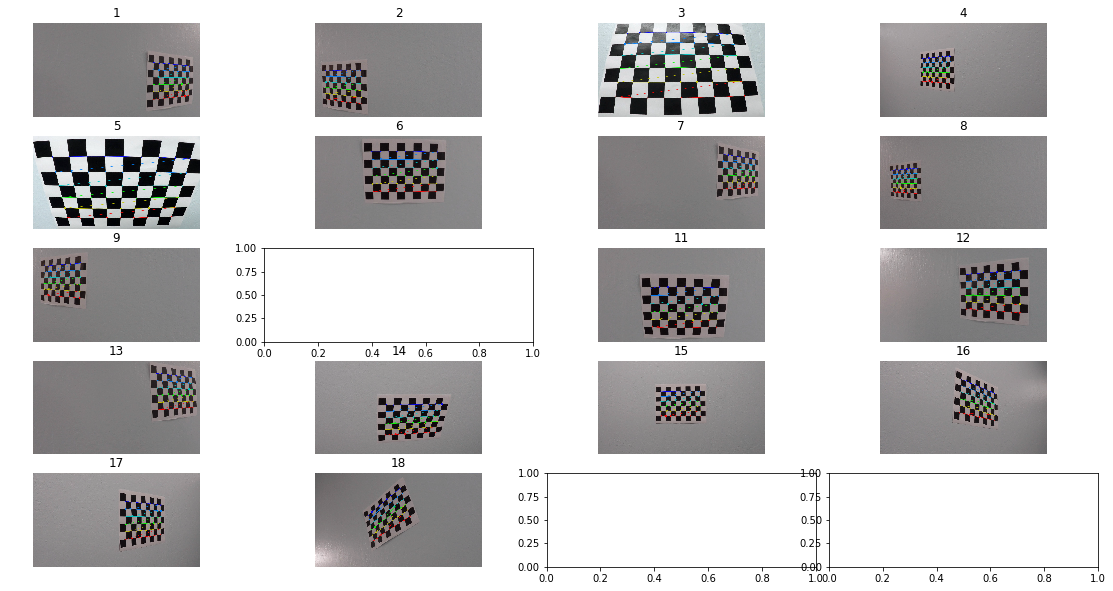

Text(0.5,1,'Undistorted Image')

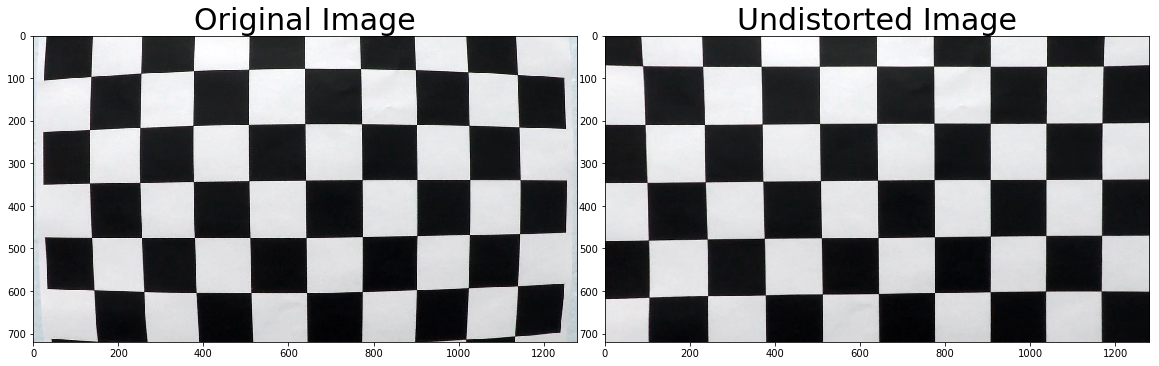

## Pipeline (single images)

#### 1. Provide an example of a distortion-corrected image.

The images below are before and after applying `cv2.undistort` function to one of images in test_images folder.

Text(0.5,1,'Undistorted Image')

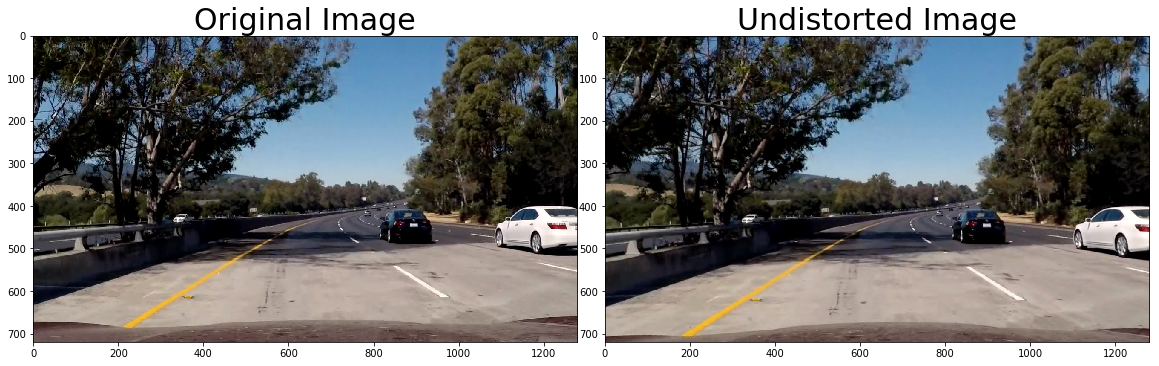

#### 2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result.

I tried sobel gradients and HSL,Luv,Lab color channel by tweaking lower and higher thresholds. 

Especially, L-channel from Luv is aiming for white lane line, b-channel from Lab is aiming for yellow lane line. 

The codes and result images are in the Jupyter notebook. 

Below is an example of HLS S-channel,Luv L-channel and Lab b-channel.

Text(0.5,1,'HLS S-Channel')

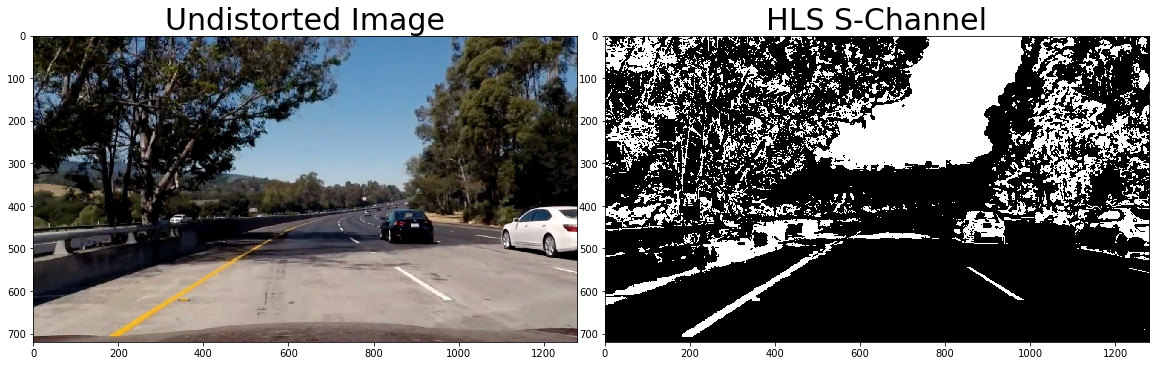

Text(0.5,1,'Luv L-Channel')

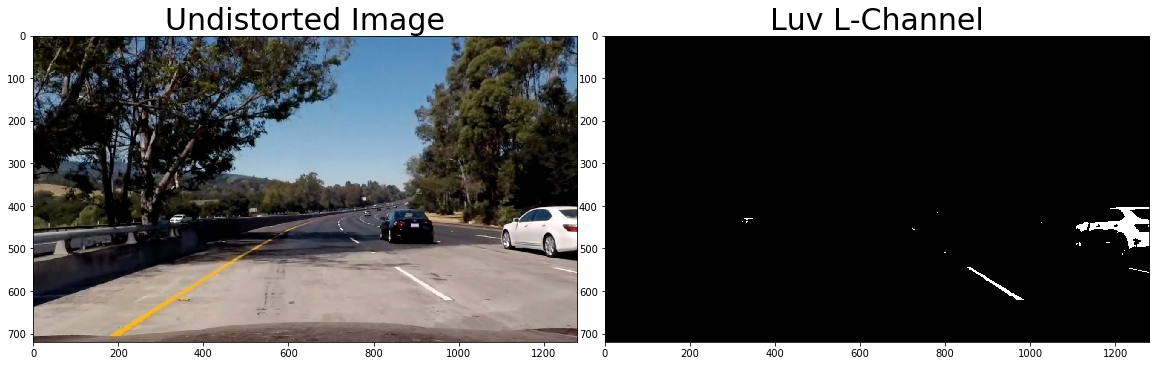

Text(0.5,1,'Lab b-Channel')

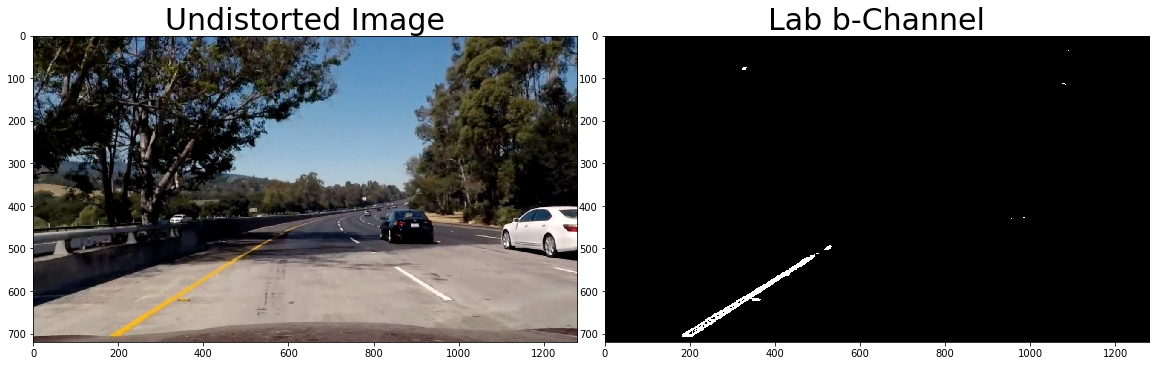

#### 3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

The code for perspective transform is in the code cell #12 in the Jupyter notebook. 
The unwarp() function takes as inputs an gray image (`gray`), source (`src`) and destination (`dst`) points.

I assumed that the camera position remain constant and that the road in the videos will remain relatively flat.
So I selected source and destination points considering straight_lines image in `test_images` folder for reference.

The images below are results of the perspective transform.

(720, 1280)


Text(0.5,1,'Unwarped Image')

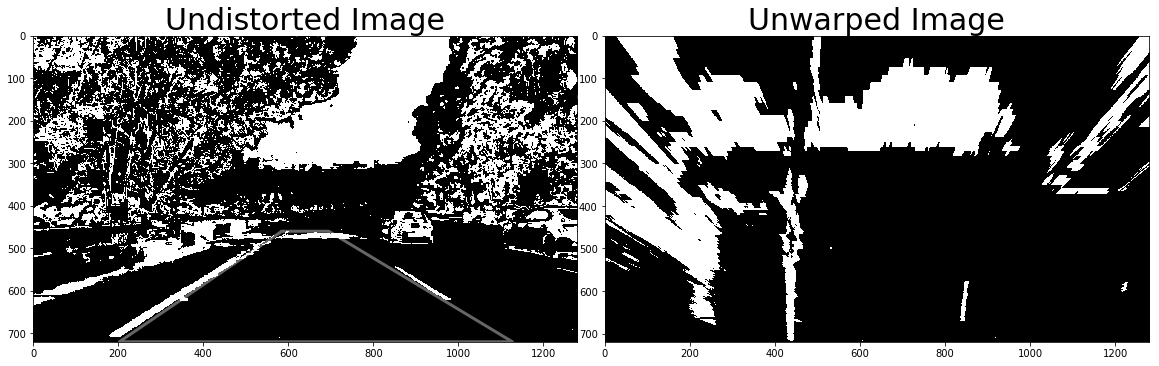

### Image Processing Pipeline
After examining, I chose to use the condition as below.

(HLS S-channel) OR (HLS L-channel) OR (Luv L channel) OR (Lab b channel)

The below images are the transition from original image.

The left is original image, the middle is undistorted and thresholded through above conditions, the right is perspective transformed one.


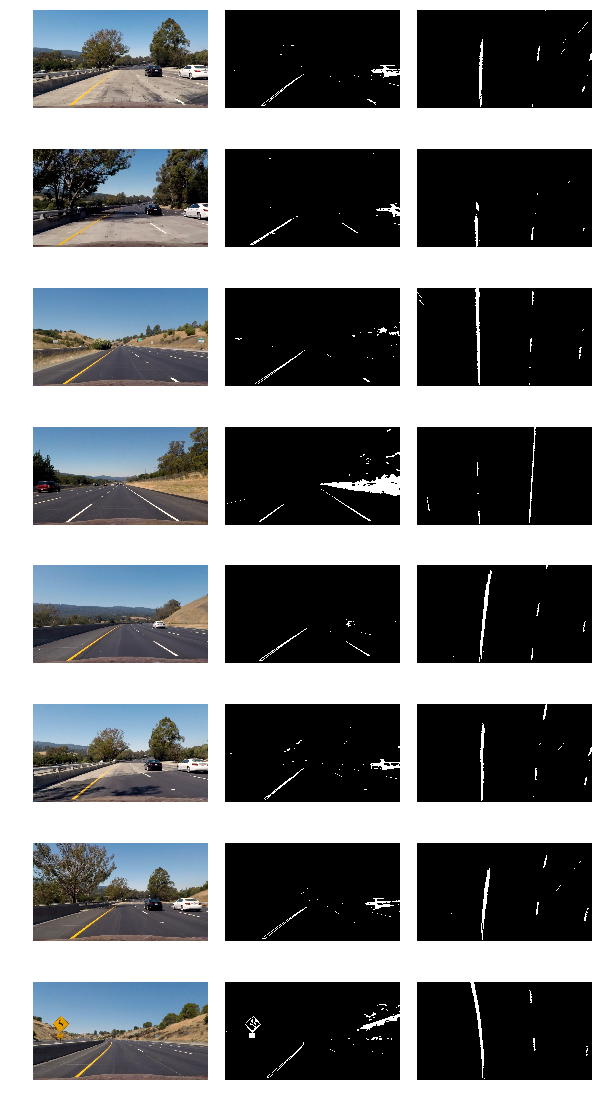

#### 4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

The functions `sliding_window_polyfit` and `polyfit_using_prev_fit`, which identify lane lines and fit a second order polynomial to both right and left lane lines, are codel cell #14 & #17 in the Jupyter notebook.

`sliding_window_polyfit` uses a histogram of lower half of the image, and find the bottom-most x position of the left and right lane. 
In the original function in the lesson, these locations were identified from the local maximum of the left and right half of the histogram, but in below implementation I changed "half" to "quarter" of the histogram just left and right of the midpoint,which resulted in better detection after several trials.

Pixels in each lane line are identified in the sliding windows and the `np.polyfit()` function finds a second order polynomial to each set of pixels. The image below demonstrates how this process works:


(720, 0)

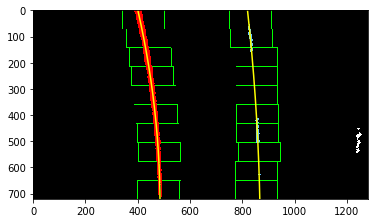

(0, 1280)

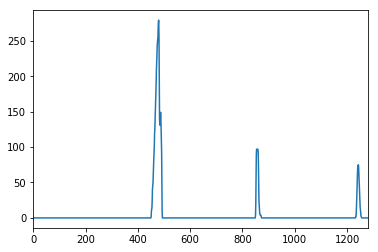

The `polyfit_using_prev_fit` function performs basically the same task, 
but it is a bit easier search process by comparing a previous fit and only searching for lane pixels within a certain range of that fit.
The image below demonstrates this - the green area is the range from the previous fit, and the yellow lines and red and blue pixels are from the current image:

(720, 0)

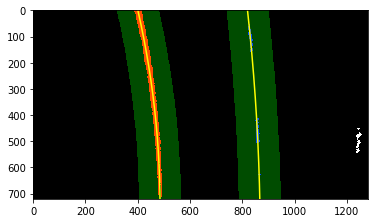

#### 5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

The codes of calculation is in the code cell #18.

`y_meters_per_pixel` and `x_meters_per_pixel` are the factors used for converting from pixels to meters. 

The radius of curvature is based upon the website(https://www.intmath.com/applications-differentiation/8-radius-curvature.php).

Position of the vehicle is considered as the center of the image, so distance from the mid-point of detected left and right lane line is "the position of the vehicle with respect to center".

#### 6. Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

This step is in the code cells #19 and #20.
By using the inverse perspective matrix `Minv` which was derived in the "Perspective transform" section, left and right lane lines and area between them are drwawn on the original image with `cv2.warpPerspective()`.
The image below is an example of the results of the draw_lane function:

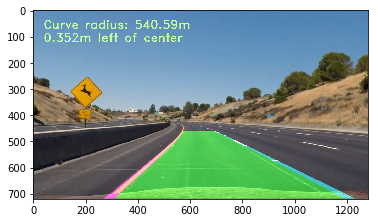

## Pipeline (video)

#### 1. Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).

Please see the video file named 'project_video_output.mp4' in current folder.

## Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project. Where will your pipeline likely fail? What could you do to make it more robust?

The main problem I had struggled was to identify the best/optimal color transform and gradients.
Sudden lighting change are very weak for my setting this time.

In this project, I utilzed narrowing the window for polyfitting section to avoid picking up noise pixels. But I am not satisfied with this since this approach is not globally optimal.
To make this algorithm more robust, some sort of smoothing factor should be included in the lane detection function. 